# Training Classifiers for ESG Ratings

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)

print(eKonf.__version__)

0.1.30+17.g71ae258.dirty


## Prepare `finsent_kr` dataset

In [3]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group='dataset=simple_auto')
ds_cfg.name = 'finsent_kr'
ds_cfg.datasets = ['analystsent_kr', 'finphrase_kr']
ds_cfg.data_dir = '/workspace/data/datasets/simple'
eKonf.print(ds_cfg)
ds = eKonf.instantiate(ds_cfg)

INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr


{'_method_': ['load', 'concatenate'],
 '_target_': 'ekorpkit.datasets.loader.Datasets',
 'autoload': True,
 'autorun': ['load'],
 'column_info': {'_target_': 'ekorpkit.info.base.ColumnInfo',
                 'columns': {'id': 'id',
                             'merge_meta_on': None,
                             'text': 'text',
                             'timestamp': None},
                 'data': {'id': 'int', 'text': 'str'},
                 'datetime': {'format': None, 'key': None, 'params': None},
                 'keys': {'id': 'id',
                          'split': 'split',
                          'text': 'text',
                          'timestamp': 'timestamp'},
                 'meta': None,
                 'segment_separator': '\\n\\n',
                 'sentence_separator': '\\n',
                 'timestamp': {'format': None, 'key': None, 'params': None}},
 'data_dir': '/workspace/data/datasets/simple',
 'datasets': ['analystsent_kr', 'finphrase_kr'],
 'filetype': '

INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:>>> Elapsed time: 0:00:00.135370 <<< 
INFO:ekorpkit.ekonf:Calling load
INFO:ekorpkit.ekonf:Calling concatenate
INFO:ekorpkit.info.base:Added corpus column [corpus] with value [analystsent_kr]
INFO:ekorpkit.info.base:Added corpus column [corpus] with value [finphrase_kr]
INFO:ekorpkit.info.base:Added corpus column [corpus] with value [analystsent_kr]
INFO:ekorpkit.info.base:Added corpus column [corpus] with value [finphrase_kr]
INFO:ekorpk

In [4]:
ds.COLUMN.INFO

{'keys': {'id': 'id',
  'text': 'text',
  'timestamp': 'timestamp',
  'split': 'split',
  '_id': '_id',
  'corpus': 'corpus',
  'dataset': 'dataset'},
 'columns': {'id': 'id',
  'text': 'text',
  'merge_meta_on': None,
  'timestamp': None},
 'data': {'text': 'object',
  'id': 'int64',
  'labels': 'object',
  'split': 'object',
  'dataset': 'str'},
 'meta': None,
 'timestamp': {'key': None, 'format': None, 'params': None},
 'datetime': {'key': None, 'format': None, 'params': None},
 'segment_separator': '\\n\\n',
 'sentence_separator': '\\n'}

## Traiing a transformer classficiation model with `finsent_kr` dataset

In [9]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:Calling train
INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.base:Added s

Downloading:   0%|          | 0.00/490 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/11372 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 11372 features created from 11372 samples.
/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/356 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2844 features created from 2844 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6616933945219067, 'acc': 0.8445850914205345, 'eval_loss': 0.3697752726546834}


Running Epoch 1 of 2:   0%|          | 0/356 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2844 features created from 2844 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6714180778759681, 'acc': 0.849507735583685, 'eval_loss': 0.3862245032626591}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/esgml/outputs/esgml-model/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/3555 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 3555 features created from 3555 samples.


Running Evaluation:   0%|          | 0/112 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▅▅▅▇▅▄▆▄▄▁▁▂▃
acc,▁█
eval_loss,▁█
global_step,▁▂▂▃▃▄▄▄▅▅▆▆▇▇██
lr,█▇▇▆▆▅▅▄▄▃▃▂▂▁
mcc,▁█
train_loss,█▁
Training loss,0.28702
acc,0.84951
eval_loss,0.38622
global_step,712


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6555096814514465, 'acc': 0.8396624472573839, 'eval_loss': 0.39716599409335424}


INFO:ekorpkit.ekonf:Calling eval
INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.base:Added sp

  0%|          | 0/3555 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 3555 features created from 3555 samples.


  0%|          | 0/112 [00:00<?, ?it/s]

INFO:ekorpkit.io.file:Saving dataframe as /workspace/projects/esgml/outputs/esgml-model/ekonelectra-base/predictions/model_test_predictions.parquet


Accuracy:  0.8331926863572433
Precison:  0.8305239087418332
Recall:  0.8331926863572433
F1 Score:  0.8314648851526979
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.79      0.83      0.81       446
     neutral       0.88      0.89      0.88      2459
    positive       0.69      0.62      0.65       650

    accuracy                           0.83      3555
   macro avg       0.78      0.78      0.78      3555
weighted avg       0.83      0.83      0.83      3555



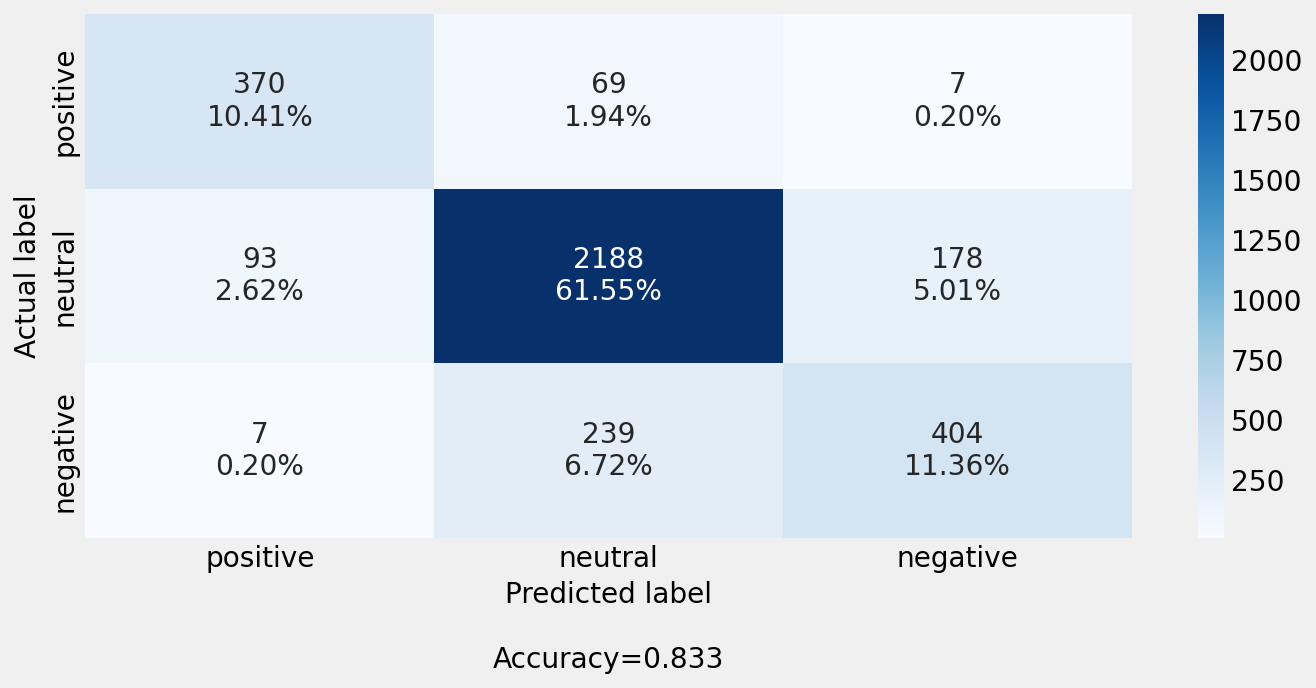

In [5]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
model_cfg._method_ = ['eval']
eKonf.instantiate(model_cfg)

## Prepare `esg_topics` dataset

In [12]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group='dataset')
ds_cfg.name = 'esg_topics'
ds_cfg.data_dir = '/workspace/data/datasets/simple'
eKonf.print(ds_cfg)
ds = eKonf.instantiate(ds_cfg)

INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]


{'_target_': 'ekorpkit.datasets.dataset.Dataset',
 'autoload': True,
 'column_info': {'_target_': 'ekorpkit.info.base.ColumnInfo',
                 'columns': {'id': 'id',
                             'merge_meta_on': None,
                             'text': 'text',
                             'timestamp': None},
                 'data': {'id': 'int', 'text': 'str'},
                 'datetime': {'format': None, 'key': None, 'params': None},
                 'keys': {'id': 'id',
                          'split': 'split',
                          'text': 'text',
                          'timestamp': 'timestamp'},
                 'meta': None,
                 'segment_separator': '\\n\\n',
                 'sentence_separator': '\\n',
                 'timestamp': {'format': None, 'key': None, 'params': None}},
 'data_dir': '/workspace/data/datasets/simple',
 'filetype': 'csv',
 'name': 'esg_topics',
 'use_name_as_subdir': True,
 'verbose': False}


In [13]:
ds.splits['train'].labels.unique()

array(['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'G-주주환원', 'S-소비자',
       'E-신재생에너지 발전', 'S-사회공헌', 'S-기술혁신', 'S-인적자본', 'E-환경영향', 'E-기후변화',
       'S-산업재해/안전관리', 'G-정보공시', 'E-환경혁신', 'S-노조/노사', 'E-원자력발전'],
      dtype=object)

## Traiing a transformer classficiation model with `esg_topics` dataset

In [7]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:Calling train
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained

  0%|          | 0/10669 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 11009 features created from 10669 samples.
/opt/conda/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6213240754599652, 'acc': 0.654300168634064, 'eval_loss': 1.2273957588170703}


Running Epoch 1 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6602906035471546, 'acc': 0.6897133220910624, 'eval_loss': 1.0642714484741813}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/esgml/outputs/esgml-model/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/1318 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▇▅▆▂▄▃▃▃▁▂▃▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▃▄▄▄▅▅▆▆▇██
lr,█▇▇▆▆▅▅▄▃▃▂▂▁
mcc,▁█
train_loss,▁█
Training loss,0.70556
acc,0.68971
eval_loss,1.06427
global_step,690


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6548289397134168, 'acc': 0.6851289833080425, 'eval_loss': 1.0937164245649826}


INFO:ekorpkit.ekonf:Calling eval
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.models.transformer.simple:Loaded model from /workspace/projects/esgml/outputs/esgml-model/ekonelectra-base/best_model
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/1318 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:ekorpkit.io.file:Saving dataframe as /workspace/projects/esgml/outputs/esgml-model/ekonelectra-base/predictions/model_test_predictions.parquet


Accuracy:  0.6851289833080425
Precison:  0.6733160703968519
Recall:  0.6851289833080425
F1 Score:  0.6675203149124428
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.61      0.56      0.58        63
     E-신재생에너지 발전       0.73      0.71      0.72        31
         E-원자력발전       1.00      0.42      0.59        19
          E-환경영향       0.50      0.51      0.50        61
          E-환경혁신       0.53      0.52      0.52        52
   G-기업윤리/불공정/소송       0.61      0.58      0.60        91
          G-정보공시       0.20      0.02      0.04        50
          G-주주환원       0.73      0.77      0.74       162
          G-지배구조       0.73      0.86      0.79       172
          S-기술혁신       0.74      0.78      0.76       158
S-기업(공급망)동반성장/상생       0.80      0.21      0.33        39
         S-노조/노사       0.87      0.86      0.86        70
          S-사회공헌       0.64      0.82      0.72        68
  

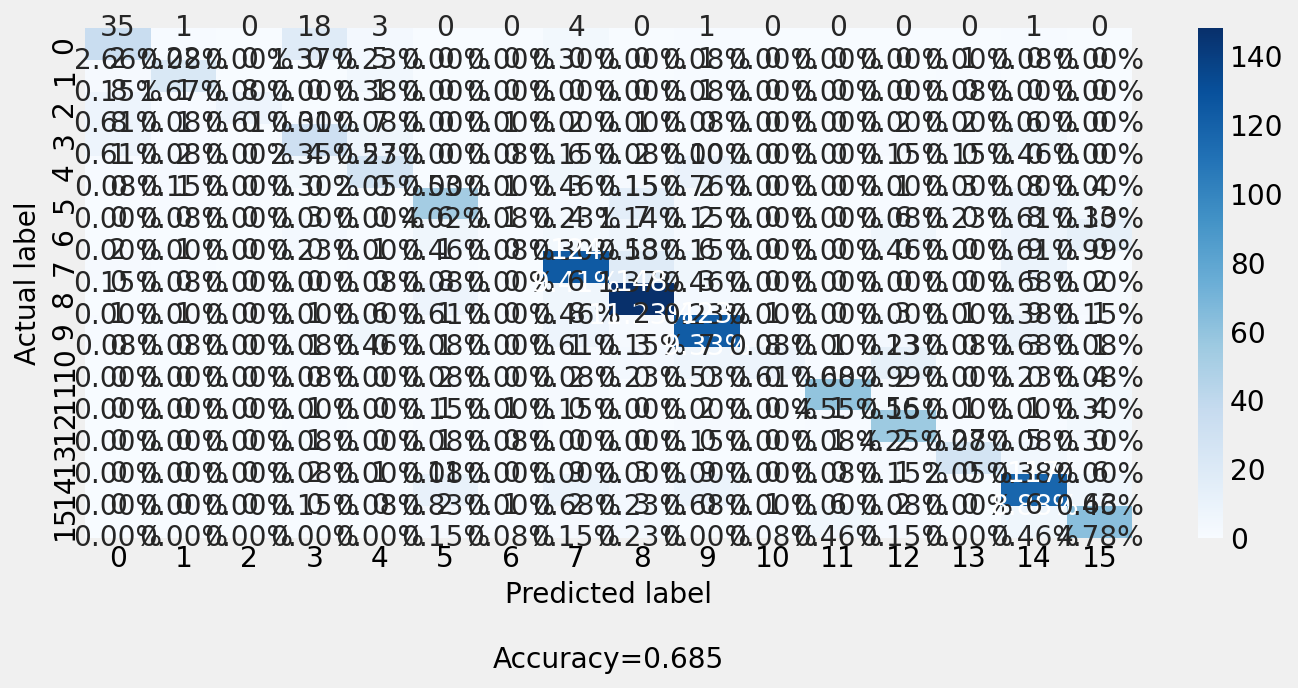

In [10]:
model_cfg._method_ = ['eval']
model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
eKonf.instantiate(model_cfg)